# 2.3.8 신경망(딥러닝)

## 신경망 모델

MLP(다층 퍼센트론)에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단계를 구성하는 은닉 유닛을 계산하고 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산함.

이런 모델은 많은 계수(또는 가중치)를 학습해야 함. 이 계수는 각 입력과 은닉층의 은닉 유닛 사이, 그리고 각 은닉 유닉과 출력 사이마다 있음.

그래서 이 모델을 선형 모델보다 강력하게 만들려면 또 다른 기교가 필요함.

각 은익 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 렐루나 하이퍼볼릭 탄젠트를 적용함.

이 함수 결과의 가중치 합을 계산하여 출력 y를 만듦.

h[0] = tanh(w[0,0]$*$x[0] + w[1,0]$*$x[1] + w[2,0]$*$x[2] + w[3,0]$*$x[3] + b[0])

h[1] = tanh(w[0,1]$*$x[0] + w[1,1]$*$x[1] + w[2,1]$*$x[2] + w[3,1]$*$x[3] + b[0])

h[2] = tanh(w[0,2]$*$x[0] + w[1,2]$*$x[1] + w[2,2]$*$x[2] + w[3,2]$*$x[3] + b[0])


y = v[0] X h[0] + v[1] X h[1] + v[2] X h[2] + b

w는 입력 x와 은닉층 h 사이의 가중치이고, v는 은닉층 h 와 출력 y 사이의 가중치임.

가중치 v 와 w는 훈련 데이터에서 학습하고, x는 입력 특성이며, y는 계산된 출력, h는 중간 계산값.

우리가 정해야 하는 중요한 매개변수는 은닉층의 유닛 개수임. 소규모 데이터셋일 경우 10개 정도도 괜찮지만 매우 복잡한 데이터셋에서는 10,000개 될 수도 있음.


In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


Text(0,0.5,'특성 1')

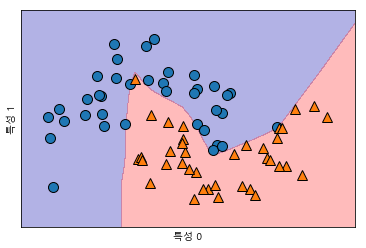

In [21]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,
                                                   random_state=42)
mlp = MLPClassifier(solver='lbfgs',random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

은닉 유닛의 개수를 줄여도 (모델의 복잡도는 낮아지고) 여전히 좋은 결과를 얻을 수 있음.

Text(0,0.5,'특성 1')

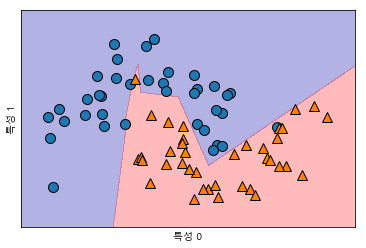

In [24]:
mlp = MLPClassifier(solver='lbfgs',random_state=0,hidden_layer_sizes=[10]).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

은닉 유닛이 10개여서 결정 경계가 조금 더 날카로워짐. 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성됨.

더 매끄러운 결정 경계를 원한다면 은닉 유닛을 추가하거나, 은닉층을 추가하거나, 또는 tanh 함수를 사용.

Text(0,0.5,'특성 1')

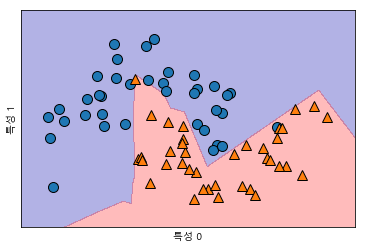

In [27]:
# 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")                                                                            

Text(0,0.5,'특성 1')

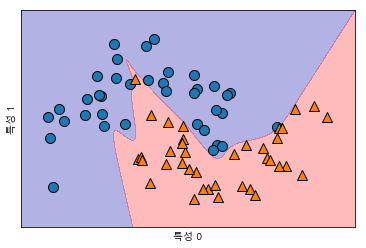

In [28]:

# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

릿지 회귀와 선형 분류기에서 한 것 처럼 L2 페널티를 상요해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있음.

MLPClassifier에서 이런 역할을 하는 매개변수는 alpha이고 기본값은 매우 낮게 되어있음.

two_moons 데이터셋에 유닛이 각각 10개와 100개인 은닉층 2개를 사용했을 때 다른 alpha값이 미치는 영향 ↓

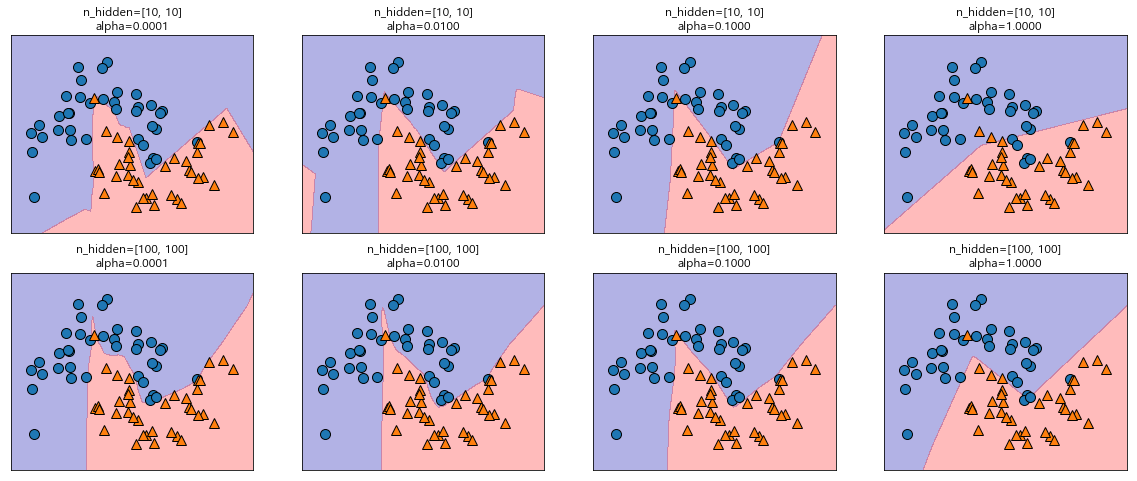

In [29]:

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

신경망에서는 학습을 시작하기 전에 가중치를 무작위로 설정하며 이 무작위한 초기화가 모델의 학습에 영향을 줌.

따라서 같은 매개변수를 사용하더라도 초깃값이 다르면 모델이 많이 달라질 수 있음.

신경망이 크고 복잡도도 적절하면 이런 점이 정확도에 미치는 영향은 크지 않지만 항상 기억하고 있어야함.(특히 작은 신경망일 경우)

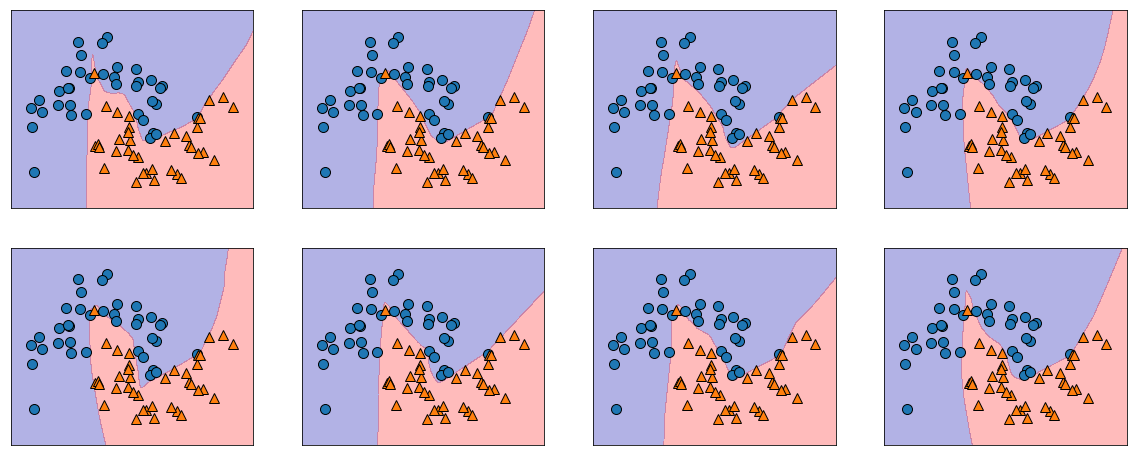

In [32]:

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [37]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [39]:
print("유방암 데이터의 특성별 최댓값:\n{}".format(cancer.data.max(axis=0)))

유방암 데이터의 특성별 최댓값:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train,y_train)

print("훈련 세트 정확도:{:.2F}".format(mlp.score(X_train,y_train)))
print("테스트 세트 정확도:{:.2F}".format(mlp.score(X_test,y_test)))

훈련 세트 정확도:0.91
테스트 세트 정확도:0.88


앞서 SVC예제에서는 데이터의 스케일이 영향을 미쳤음. 신경망도 모든 입력 특성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋음.

In [46]:
#훈련 세트 각 특성의 평균을 계산
mean_on_train = X_train.mean(axis=0)
#훈련 세트 각 특성의 표준 편차를 계산
std_on_train = X_train.std(axis=0)

#데이터에서 평균을 빼고 표준 편차로 나누면
#평균 0, 표준 편차 1인 데이터로 변환됨.
X_train_scaled = (X_train - mean_on_train)/std_on_train
#같은 변환을 테스트 세트에도 해줌.
X_test_scaled = (X_test - mean_on_train)/std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3F}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3F}".format(mlp.score(X_test_scaled,y_test)))

# 경고가 나오면 반복 횟수를 늘려야 함.

훈련 세트 정확도:0.991
테스트 세트 정확도:0.965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [47]:
mlp = MLPClassifier(max_iter=1000,random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3F}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3F}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.993
테스트 세트 정확도:0.972


일반화 성능을 더 올리기 위해 모델의 복잡도를 낮춰줌.

가중치를 더 강하게 규제하도록 alpha 매개변수를 증가시켜줌.

In [50]:
mlp = MLPClassifier(max_iter=1000,alpha=1,random_state=0)
mlp.fit(X_train_scaled, y_train)

print("훈련 세트 정확도:{:.3F}".format(mlp.score(X_train_scaled,y_train)))
print("테스트 세트 정확도:{:.3F}".format(mlp.score(X_test_scaled,y_test)))

훈련 세트 정확도:0.988
테스트 세트 정확도:0.972


## 신경망의 복잡도 추정

신경망에서 가장 주요한 매개변수는 은닉층의 개수와 각 은닉층의 유닛 수임.

처음엔 한개 또는 두개의 은닉층으로 시작해서 늘려갸야함. 각 은닉층의 유닛 수는 보통 입력 특성의 수와 비슷하게 설정하지만 수천 초중방을 넘는 일은 거의 없음.

신경망의 매개변수를 조정하는 일반적인 방법은 먼저 충분히 과대적합되어서 문제를 해결할 만큼 큰 모델은 만들고, 훈련 데이터가 충분히 학습될 수 있다고 생각될 떄 신경망 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능을 향상시킴.

solver 매개변수를 사용해 모델을 학습시키는 방법 또는 매개변수 학습에 사용하는 알고리즘을 지정할 수 있음.

- 기본값 'adam': 대부분의 경우에 잘 작동하지만 데이터의 스케일에 민감함.(그래서 데이터를 평균0, 분산1로 조정하는 게 중요함)

- 'lbfgs': 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸림.

- 'sgd': 다른 여러 매개변수와 함께 튜닝하여 최선의 결과를 만들 수 있음.